<a href="https://colab.research.google.com/github/surya4331/surya4331-Capstone_Project_IPL_T20_Analysis/blob/main/IPL_T20_Analysis_final_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>


#**IPL ANALYSIS**
This is IPL's data containing 3 datasets - one gives details about the matches and   2nd one about delivers of the league from(2008-2018), 3rd onegives info about teams. Here we try to get an overview of IPL in terms of teams, venues, matches, batsmen and bowlers.

#**PROBLEM STATEMENTS.**


1.  Most number of Man of the Matches in each season.
2.   Highest winning margin in terms of runs and wickets in every year.
3.Highest sum of score by team's in each season?
4.Is scoring over the years is easy?
5.BEST BOWLERS in terms of number of wickets.
6.BEST BOWLING team in terms of economy.
7.After winning toss batting or fielding is favour for winning match
8.Toss winning team choose to field or bat?





In [ ]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading Data's**

*   Matches Data set : This dataset contains information about the venues, players, umpires, toss decisions in 696 matches of IPL from 2008 - 2018.
*   Delivery Data set: This dataset contains ball-by-ball information about 696 matches of IPL from 2008 - 2018.
*   Teams Data set: This data set contains team information from ipl 2008-2019.   



In [ ]:
delivery_df=pd.read_csv('/content/drive/MyDrive/deliveries.csv')
matches_df=pd.read_csv('/content/drive/MyDrive/matches.csv')
teams_df=pd.read_csv('/content/drive/MyDrive/teams.csv')

In [ ]:
matches_df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#Getting information of matches dataset.

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.columns   # checking columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#**1.Most number of Man of the Matches in each season.**

In [ ]:
#Slicing
MOM_df=matches_df[['Season','player_of_match']]
MOM_df.head()

,Season,player_of_match
0,IPL-2017,Yuvraj Singh
1,IPL-2017,SPD Smith
2,IPL-2017,CA Lynn
3,IPL-2017,GJ Maxwell
4,IPL-2017,KM Jadhav


            *Slicing the matches data set to get only season and player of the match columns and got new Dataframe as MOM_df


In [ ]:
#getting info
MOM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           756 non-null    object
 1   player_of_match  752 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


          *Checking for the null values in the dataframe and there are 4 null values in the column player_of_match.

In [ ]:
#clearing null value rows
no_na_df=MOM_df[~MOM_df['player_of_match'].isna()]
no_na_df.head(5)

,Season,player_of_match
0,IPL-2017,Yuvraj Singh
1,IPL-2017,SPD Smith
2,IPL-2017,CA Lynn
3,IPL-2017,GJ Maxwell
4,IPL-2017,KM Jadhav


In [ ]:
no_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           752 non-null    object
 1   player_of_match  752 non-null    object
dtypes: object(2)
memory usage: 17.6+ KB


        * After removing the null values and again rechecking for the null values in the dataframe

In [ ]:
#getting unique season values
Total_seasons=sorted(matches_df['Season'].unique())
Total_seasons

['IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2017',
 'IPL-2018',
 'IPL-2019']

In [ ]:
#simplifing
player_n=[]
nom=[]
for i in Total_seasons:
  s=no_na_df[no_na_df['Season']==i]
  r=s['player_of_match'].value_counts().reset_index()
  player_n.append(r.loc[0,:][0])
  nom.append(r.loc[0,:][1])

player_n  
nom


[5, 3, 4, 6, 5, 5, 4, 4, 5, 3, 4, 4]

             *Extracting player name and maximum number of Man of the matches won by a player in each season

In [ ]:
#creating a dataframe 
most_mom=pd.DataFrame({'season':Total_seasons,
                             'player':player_n,
                             'numbers':nom})
most_mom.head()

,season,player,numbers
0,IPL-2008,SE Marsh,5
1,IPL-2009,YK Pathan,3
2,IPL-2010,SR Tendulkar,4
3,IPL-2011,CH Gayle,6
4,IPL-2012,CH Gayle,5


    * Created new dataframe with the columns **season**,** player** and  **number** .

In [ ]:
#Getting information
most_mom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   12 non-null     object
 1   player   12 non-null     object
 2   numbers  12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
# summary
most_mom.describe()

,numbers
count,12.000000
mean,4.333333
std,0.887625
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,6.000000


      * We can see the summary of the most_mom dataframe.

Text(0.5, 0, 'Players')

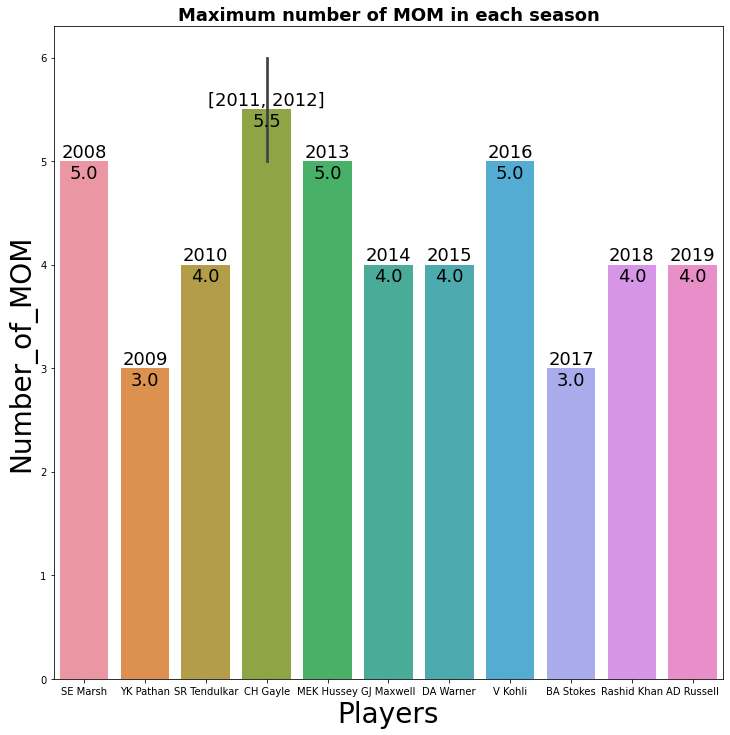

In [ ]:
plt.figure(figsize=(12,12))
ax=sns.barplot(x='player',y='numbers',data=most_mom)
rects=ax.patches
labels=[2008,2009,2010,[2011,2012],2013,2014,2015,2016,2017,2018,2019]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom',fontsize=18)
for p in rects:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points',fontsize=18)
plt.title("Maximum number of MOM in each season",fontsize=18,fontweight="bold")
plt.ylabel('Number_of_MOM', fontsize=28)
plt.xlabel('Players', fontsize=28)

*By looking into above graph we can see that most no of man of the matches won over the years . Maximum is 5.5 i.e 6 that is in the year 2011,2012 by CH Gayle, Minimum is by Ben stokes in the year 2017.

#**2.Highest winning margin in terms of runs and wickets in every year.**

In [ ]:
#slicing of dataframe
new_df=matches_df[['Season','team1','team2','winner','win_by_runs','win_by_wickets']]
new_df.head()

,Season,team1,team2,winner,win_by_runs,win_by_wickets
0,IPL-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0
1,IPL-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7
2,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10
3,IPL-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,6
4,IPL-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0


       * For getting the margin  in terms of runs and wickets , sliced the matches_df with columns Season , team1, team2, winner , win_by_runs,win_by_wickets.

In [ ]:
#fetching info....
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          756 non-null    object
 1   team1           756 non-null    object
 2   team2           756 non-null    object
 3   winner          752 non-null    object
 4   win_by_runs     756 non-null    int64 
 5   win_by_wickets  756 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 35.6+ KB


In [ ]:
#working on the data....@.....
margin_in_runs=[]
margin_in_wickets=[]
for i in Total_seasons:
  s=new_df[new_df['Season']==i]
  margin_in_runs.append(s['win_by_runs'].max())
  margin_in_wickets.append(s['win_by_wickets'].max())

margin_in_runs
margin_in_wickets

[10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 9]

               * storing maximum margin in terms of runs in list margin_in_runs.
               * storing maximum margin in terms of wickets in list margin_in_wickets.


In [ ]:
#creating data
winning_margin=pd.DataFrame({'season':Total_seasons,
                                  
                             'win_by_runs':margin_in_runs,
                             'win_by_wickets':margin_in_wickets})
winning_margin

,season,win_by_runs,win_by_wickets
0,IPL-2008,140,10
1,IPL-2009,92,10
2,IPL-2010,98,10
3,IPL-2011,111,10
4,IPL-2012,86,10
5,IPL-2013,130,10
6,IPL-2014,93,9
7,IPL-2015,138,10
8,IPL-2016,144,10
9,IPL-2017,146,10


               * Creating dataframe with 3 lists Total_seasons , margin_in_runs and margin_in_wickets as season, win_by_runs and win_by_wickets respectively.

In [ ]:
#summary
winning_margin.describe()

,win_by_runs,win_by_wickets
count,12.000000,12.000000
mean,116.500000,9.833333
std,22.342377,0.389249
min,86.000000,9.000000
25%,96.750000,10.000000
50%,114.500000,10.000000
75%,138.500000,10.000000
max,146.000000,10.000000


        *   we can get mean , minimum and maximum values from the dataset.

Text(0.5, 0, 'season')

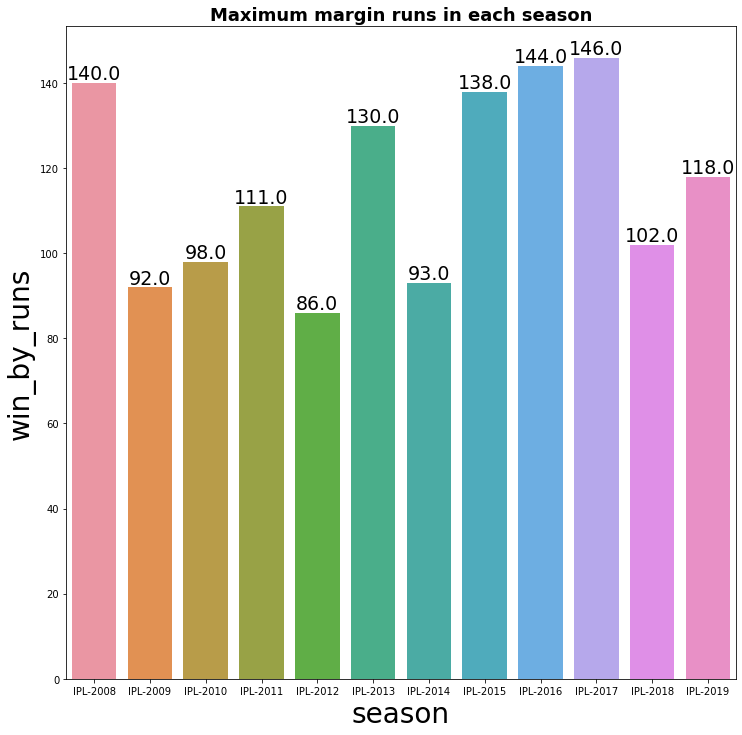

In [ ]:
#visualisation
plt.figure(figsize=(12,12))
splot=sns.barplot(x='season',y='win_by_runs',data=winning_margin)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=19)
plt.title("Maximum margin runs in each season",fontsize=18,fontweight="bold")
plt.ylabel('win_by_runs', fontsize=28)
plt.xlabel('season', fontsize=28)

                  *  In the above graph we can see the maximum margin in terms of runs over the years.
                     Maximum is in the year 2017 i.e 146 runs and Minimum in the year 2012 i.e 86 runs.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

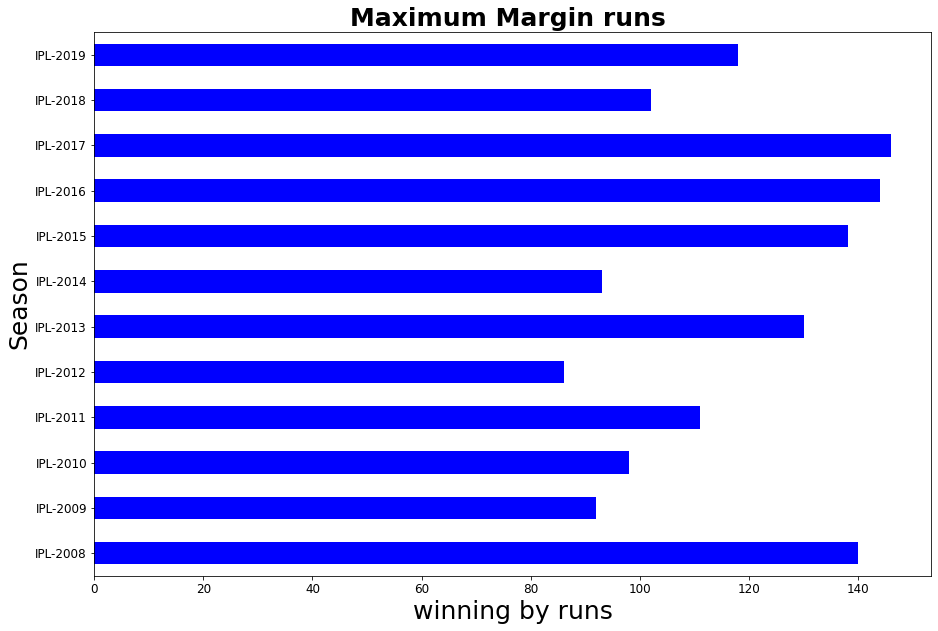

In [ ]:
#graphcal output...
new_df.groupby('Season')['win_by_runs'].max().plot(kind = 'barh', linewidth = 3, figsize =(15,10),
                                                                                             color = 'blue')

plt.title("Maximum Margin runs ",fontsize= 25, fontweight = 'bold')
plt.ylabel("Season", size = 25)
plt.xlabel("winning by runs", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

             * same as previous graph just x and y are interchanged.      

Text(0.5, 0, 'season')

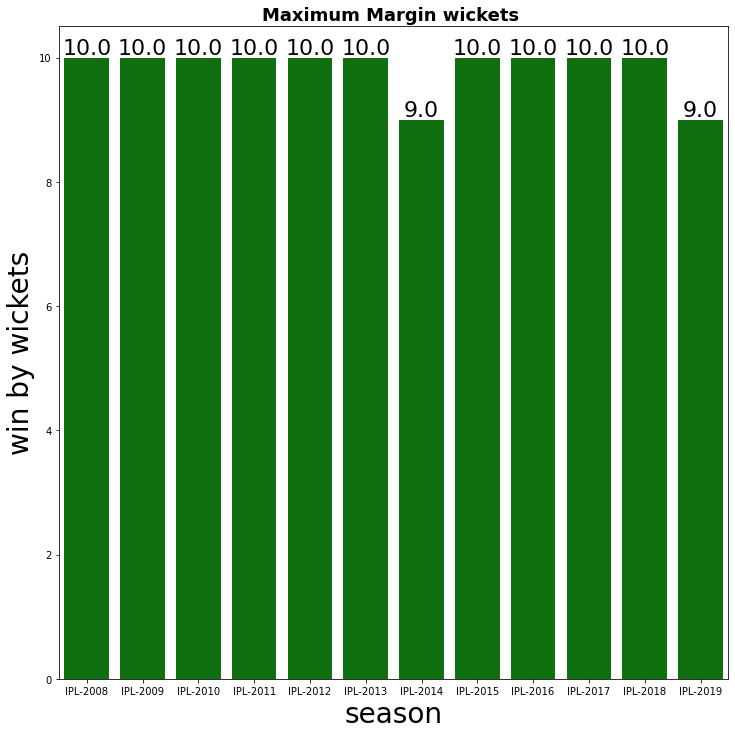

In [ ]:
#ploting.....
plt.figure(figsize=(12,12))
wplot=sns.barplot(x='season',y='win_by_wickets',data=winning_margin,color = 'green')
for p in wplot.patches:
  wplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=22)
plt.title("Maximum Margin wickets ",fontsize=18,fontweight="bold")
plt.ylabel('win by wickets', fontsize=28)
plt.xlabel('season', fontsize=28)

                 * In almost every season highest margin in terms of wickets is 10 wickets except in 2014, 2019. 

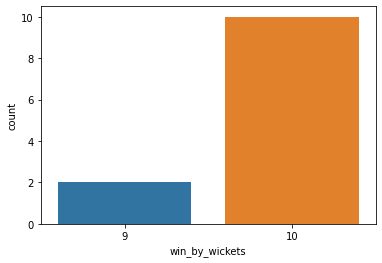

In [ ]:
ax = sns.countplot(x="win_by_wickets", data=winning_margin)

                  * Counting the number unique from the previous graph, there are two 9- wickets winning margin and ten 10-wickets winning margin.

#**3. Highest sum of score by team's in each season?**

In [ ]:
#starting the analysis with the delivery data
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# features in the data
delivery_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
#basic info
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
#summary
delivery_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
#merging the data
merge_df=pd.merge(matches_df,delivery_df,left_on='id',right_on='match_id')
merge_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


               * Merged dataframe formed by commom id in matches and delivery dataframes respectively.

In [ ]:
#info
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   Season            179078 non-null  object
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [ ]:
#columns
merge_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
#grouping....
team_runs_in_each_season=merge_df.groupby(['Season', 'batting_team'],as_index=False).agg({'batsman_runs': "sum"}).sort_values(by='Season')
team_runs_in_each_season.head()

,Season,batting_team,batsman_runs
0,IPL-2008,Chennai Super Kings,2365
1,IPL-2008,Deccan Chargers,2117
2,IPL-2008,Delhi Daredevils,2000
3,IPL-2008,Kings XI Punjab,2340
4,IPL-2008,Kolkata Knight Riders,1801


              * Grouping the dataframe according to the season and batting team , then getting the sum of the batsmen runs for each team in each season.

In [ ]:
#info..
team_runs_in_each_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        100 non-null    object
 1   batting_team  100 non-null    object
 2   batsman_runs  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
#maximum total team score in a season...
team_runs=[]

for i in Total_seasons:
  season1=team_runs_in_each_season[team_runs_in_each_season['Season']==i]
  team_runs.append(season1['batsman_runs'].max())

team_runs

[2424, 2283, 2553, 2461, 2716, 2845, 2824, 2611, 2863, 2633, 2809, 2676]

                 * Storing the maximum total team score in every season.

In [ ]:
#Storing the team name of maximum total team score in every season
team_name=[]
for i in team_runs:
  name=team_runs_in_each_season[team_runs_in_each_season['batsman_runs']==i]
  team_name.append(name['batting_team'].unique())

print(team_name)

[array(['Rajasthan Royals'], dtype=object), array(['Deccan Chargers'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object), array(['Chennai Super Kings'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Kings XI Punjab'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Royal Challengers Bangalore'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Chennai Super Kings'], dtype=object), array(['Mumbai Indians'], dtype=object)]


                 * Storing the team name of  maximum total team score in every season.

In [ ]:
#creating df
max_runs_by_team=pd.DataFrame({'season':Total_seasons,
                               'teams_with_max_runs_in_season':team_name,
                               'max_runs_in_season':team_runs
                               
})
max_runs_by_team

,season,teams_with_max_runs_in_season,max_runs_in_season
0,IPL-2008,[Rajasthan Royals],2424
1,IPL-2009,[Deccan Chargers],2283
2,IPL-2010,[Mumbai Indians],2553
3,IPL-2011,"[Chennai Super Kings, Sunrisers Hyderabad]",2461
4,IPL-2012,[Chennai Super Kings],2716
5,IPL-2013,[Mumbai Indians],2845
6,IPL-2014,[Kings XI Punjab],2824
7,IPL-2015,[Mumbai Indians],2611
8,IPL-2016,[Royal Challengers Bangalore],2863
9,IPL-2017,[Mumbai Indians],2633


                      * Created dataframe using total team runs , team names and seasons

In [ ]:
#fetching summary of df
max_runs_by_team.describe()

,max_runs_in_season
count,12.000000
mean,2641.500000
std,184.839242
min,2283.000000
25%,2530.000000
50%,2654.500000
75%,2812.750000
max,2863.000000


                      * Mean , minimum, maximum value is determined.

Text(0, 0.5, 'Runs')

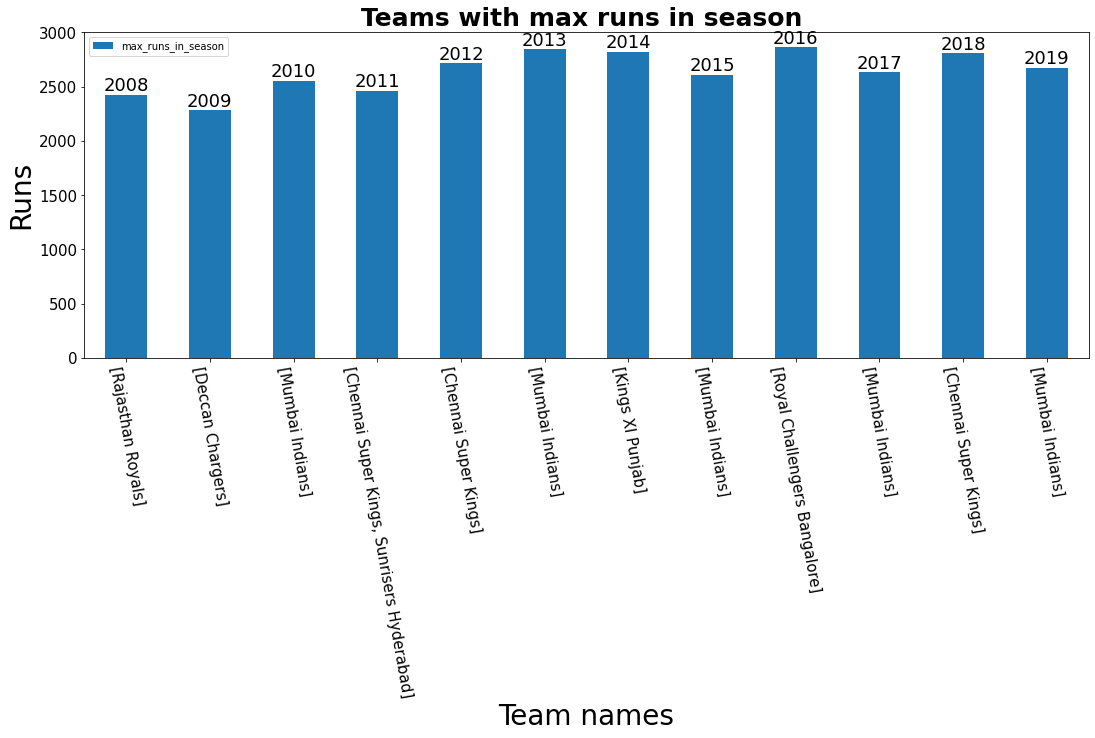

In [ ]:
#ploting....
a=list(max_runs_by_team['max_runs_in_season'])
b=list(max_runs_by_team['teams_with_max_runs_in_season'])
ax=max_runs_by_team.plot.bar( x="teams_with_max_runs_in_season", y="max_runs_in_season", rot=1000,figsize =(18,6),fontsize= 15)
plt.title("Teams with max runs in season ",fontsize= 25, fontweight = 'bold')
rects=ax.patches
labels=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom',fontsize=18)
plt.xlabel('Team names', fontsize=28)
plt.ylabel('Runs', fontsize=28)

          * Maximum total team runs is in the year 2013 and scored by Mumbai Indians.
          * Minimum in the year 2009  by Decan Chargers.

#**4. Is scoring over the years is easy?**

In [ ]:
#arranging....
season_runs=merge_df.groupby('Season')['batsman_runs'].sum()

max_season_runs=pd.DataFrame(season_runs)
max_season_runs

,batsman_runs
Season,
IPL-2008,16809
IPL-2009,15376
IPL-2010,17754
IPL-2011,19928
IPL-2012,21322
IPL-2013,21487
IPL-2014,17943
IPL-2015,17427
IPL-2016,17963


           * Grouping according to the season and summing the batsmen runs.

In [ ]:
#summary
max_season_runs.describe()

,batsman_runs
count,12.000000
mean,18607.166667
std,1832.290610
min,15376.000000
25%,17672.250000
50%,17953.000000
75%,19911.500000
max,21487.000000


              * Determined mean, minimum , maximum values of the dataframe

In [ ]:
#renaming column name
max_season_runs.rename(columns={'batsman_runs':'Total_runs'})

,Total_runs
Season,
IPL-2008,16809
IPL-2009,15376
IPL-2010,17754
IPL-2011,19928
IPL-2012,21322
IPL-2013,21487
IPL-2014,17943
IPL-2015,17427
IPL-2016,17963


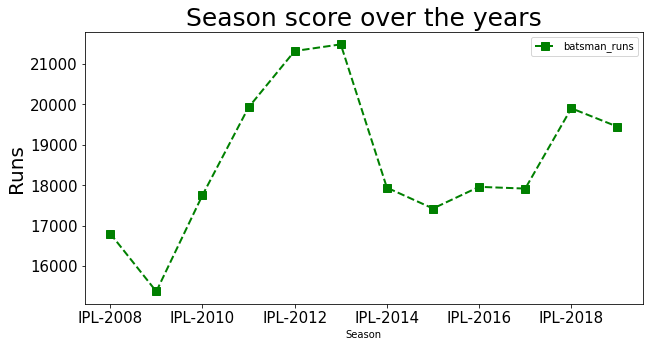

In [ ]:
#visualizing
max_season_runs.plot(color='green', marker='s', linestyle='dashed',figsize =(10,5),linewidth=2,markersize=8,fontsize=15) 
plt.title("Season score over the years",size=25)
plt.ylabel('Runs',fontsize=20)
plt.rcParams['figure.figsize'] = (50, 10) 

               * There is maximum runs scored in the year 2012,2013 reason for this is because number 
                  of matches played in these seasons are more compared to other seasons.

#**5.BEST BOWLERS in terms of number of wickets.**


In [ ]:
# Cleaning The data
elements=["bowler","dismissal_kind"]
keep_el=delivery_df[elements].copy()
wicket_by_bowler=keep_el[keep_el["dismissal_kind"]!="run out"]
wicket_by_bowlers=wicket_by_bowler.dropna()
wicket_by_bowlers.shape
# fetching the best bowler
Top_wicket_Takers=wicket_by_bowlers.groupby("bowler")["dismissal_kind"].count().reset_index(name="Wickets")
Top_wicket_Takers.sort_values("Wickets",ascending=False,inplace=True)
Top_wicket_Takers.head(10)

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


              * Created the top 10 list of best bowlers according to the number of wickets.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


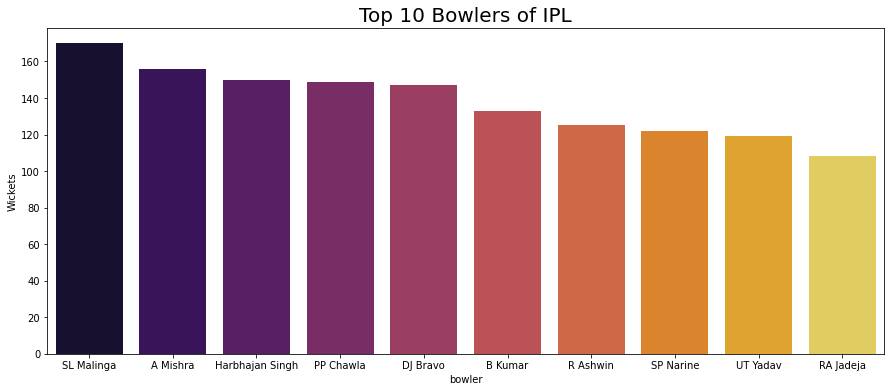

In [ ]:
x=Top_wicket_Takers["bowler"].head(10)
y=Top_wicket_Takers["Wickets"].head(10)
#Plotting The Graph
#plt.barh(x,y,color="green")
fig, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Best Bowler of IPL');
#ax.set_xlabel( "best Bowlers" , size = 12 )
  
sns.barplot(x,y,ax=ax,palette="inferno").set_title("Top 10 Bowlers of IPL",fontdict = { 'fontsize': 20})

sns.set_style('darkgrid')

             * Lasith malinga has taken maximum number of wickets in overall ipl.

#**6.BEST BOWLING team in terms of economy.**

In [ ]:
#uniques....
team_names=sorted(teams_df['team1'].unique())
team_names

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

            * Storing the participated teams  in the IPL.

In [ ]:
#getting the economy of the each team
total_runs=[]
total_overs=[]
economy=[]
for i in team_names:
  record=delivery_df[delivery_df["bowling_team"]==i]
  x=record['total_runs'].sum()
  y=math.ceil(sum([1 for i in record['ball']])/6)
  economy.append(x/y)

economy

[7.728220858895705,
 7.709356337093563,
 8.152439024390244,
 7.949695610381288,
 8.612521150592217,
 8.177251732101617,
 7.382899628252788,
 7.843839541547278,
 7.700772715161205,
 7.535164835164835,
 7.820849154297549,
 7.565217391304348,
 7.825925925925926,
 8.070338983050847,
 7.832394366197183]

         * Extracted the economy of the teams using the runs given by the team and overs bowled by the team.

In [ ]:
#rounding up....
Economy_of_each_team=[round(x,2) for x in economy]

In [ ]:
#removing duplicates
all_teams=set(delivery_df["bowling_team"])

In [ ]:
#storing in variables
a=all_teams
b=Economy_of_each_team
c=all_teams.copy()


In [ ]:
#zipping up variables
lets_try=pd.DataFrame(zip(a,b,c))
lets_try.columns=["team_name","economy","teamsss"]
lets_try

,team_name,economy,teamsss
0,Kolkata Knight Riders,7.73,Kolkata Knight Riders
1,Kings XI Punjab,7.71,Kings XI Punjab
2,Rajasthan Royals,8.15,Rajasthan Royals
3,Pune Warriors,7.95,Pune Warriors
4,Delhi Capitals,8.61,Delhi Capitals
5,Sunrisers Hyderabad,8.18,Sunrisers Hyderabad
6,Gujarat Lions,7.38,Gujarat Lions
7,Royal Challengers Bangalore,7.84,Royal Challengers Bangalore
8,Deccan Chargers,7.70,Deccan Chargers
9,Delhi Daredevils,7.54,Delhi Daredevils


In [ ]:
#summary
lets_try.describe()

,economy
count,15.000000
mean,7.860667
std,0.303185
min,7.380000
25%,7.705000
50%,7.830000
75%,8.010000
max,8.610000


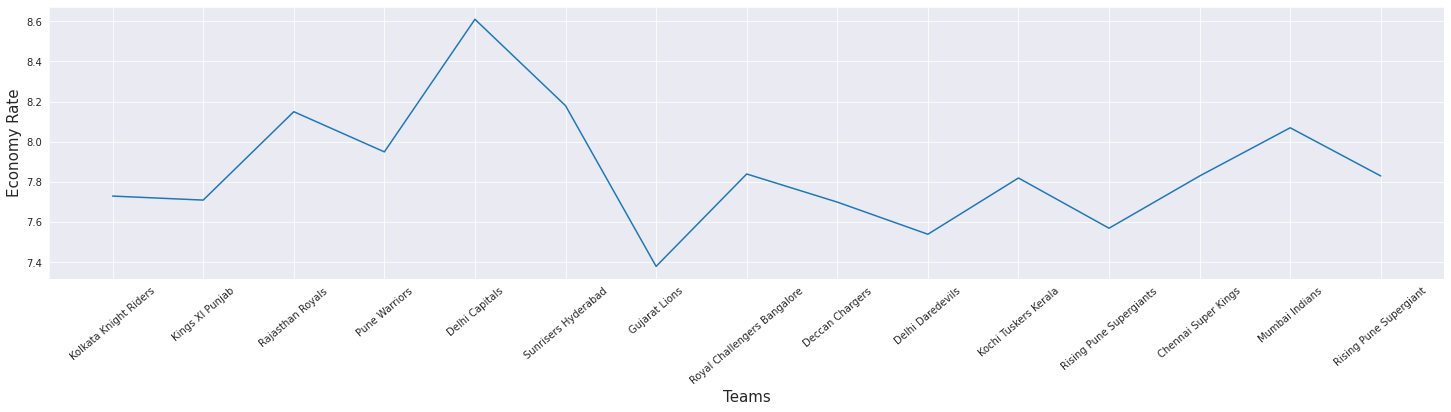

In [ ]:
#graph...
fig, bx = plt.subplots(figsize=(25, 5))
bx.set_xlabel("Teams",size = 15 )
bx.set_ylabel( "Economy Rate",size = 15 )
sns.lineplot(x="team_name",y="economy",data=lets_try,ax=bx,markers=True,palette="tab10")
plt.xticks(rotation=40)

  
plt.show()

               * Bowling Economy of the teams

#**7.After winning toss batting or fielding is favour for winning match**


In [ ]:
#creating the new dataframe from  matches dataset.
toss = df[['team1','team2','toss_winner','toss_decision','winner']]  
toss

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


           * Creating dataframe by slicing the matches_df

In [ ]:
toss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   toss_winner    756 non-null    object
 3   toss_decision  756 non-null    object
 4   winner         752 non-null    object
dtypes: object(5)
memory usage: 29.7+ KB


            # there are null values.

In [ ]:
#removing null values
toss_new = toss.dropna()
toss_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          752 non-null    object
 1   team2          752 non-null    object
 2   toss_winner    752 non-null    object
 3   toss_decision  752 non-null    object
 4   winner         752 non-null    object
dtypes: object(5)
memory usage: 35.2+ KB


#case 1: winning toss and choose to bat.

In [ ]:
#Number of matches won toss and opted for bat
toss_bat=toss_new[toss_new['toss_decision']=='bat']
won_toss_bat = len(toss_bat)

#logic for filtering the toss winner with winner of the match who choosed for bat
winners_b=toss_bat[toss_bat['toss_winner']==toss_bat['winner']]
won_toss_bat_win = len(winners_b)

#winning the toss and lost match by batting
won_toss_bat_lost = won_toss_bat - won_toss_bat_win

# winning the match who won the toss and choosed to bat
winning_bat_toss_percentage = 100*(won_toss_bat_win/won_toss_bat)

# Lossing the match who won the toss and choosed to bat
lossing_bat_toss_percentage = 100 - winning_bat_toss_percentage


             * Caluclating winning and loosing percent of match after winning toss and choose to batting.

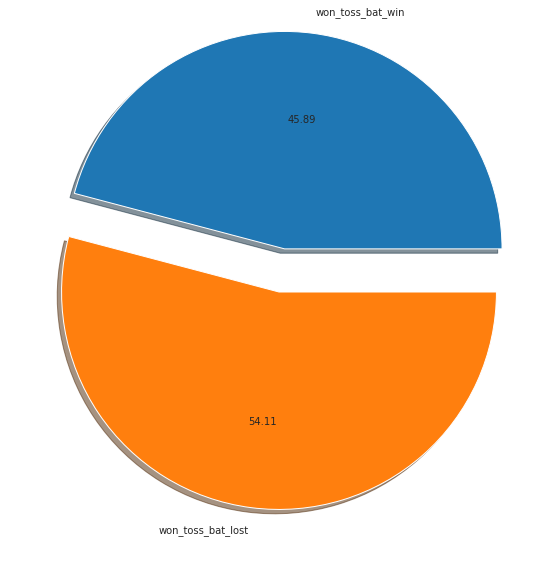

In [ ]:
#visualizing in pie chart result...
percentage_batting_string = ['winning_bat_toss_percentage','lossing_bat_toss_percentage']
percentage_batting_value = [winning_bat_toss_percentage,lossing_bat_toss_percentage]
percentage_batting_value_np= np.array(percentage_batting_value)

mylabels = ['won_toss_bat_win','won_toss_bat_lost']


myexplode = [0.2, 0]

plt.pie(percentage_batting_value_np, labels = mylabels, explode = myexplode, shadow = True,autopct='%.2f', radius = 1.5)

plt.show()

                 * When team choose to bat after winning toss lost more number of matches i.e 54.11%.

#case 2: winning toss and choose to field.

In [ ]:
#Number of matches won toss and opted for field
toss_field=toss_new[toss_new['toss_decision']=='field']
won_toss_field = len(toss_field)

#logic for filtering the toss winner with winner of the match who choosed for field
winners_f=toss_field[toss_field['toss_winner']==toss_field['winner']]
won_toss_field_win = len(winners_f)

#winning the toss and lost match by field
won_toss_field_lost = won_toss_field - won_toss_field_win

# winning the match who won the toss and choosed to field
winning_field_toss_percentage = 100*(won_toss_field_win/won_toss_field)

# Lossing the match who won the toss and choosed to field
lossing_field_toss_percentage = 100 - winning_field_toss_percentage


            * Caluclating winning and loosing percent of match after winning toss and choose to fielding.

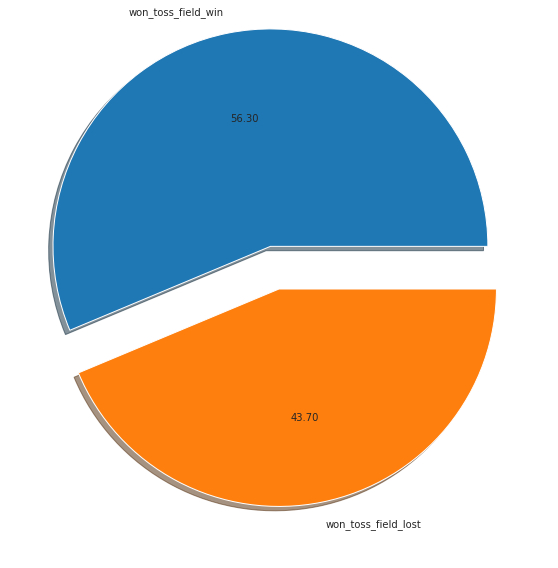

In [ ]:
#Graphical output
won_toss_fielding = ['won_toss_field_win', 'won_toss_field_lost']
val=[won_toss_field_win,won_toss_field_lost]

myexplode = [0.2, 0]

plt.pie(val, labels = won_toss_fielding, explode = myexplode, shadow = True,autopct='%.2f')

plt.show()

                                     * When team choose to field after winning toss won more number of matches i.e 56.30%.

#**8.Toss winning team choose to field or bat?**


In [ ]:
#counting toss winners values
most_tossWinner  = matches_df['toss_winner'].value_counts()
most_tossWinner

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Toss Winner Count for Each teams')

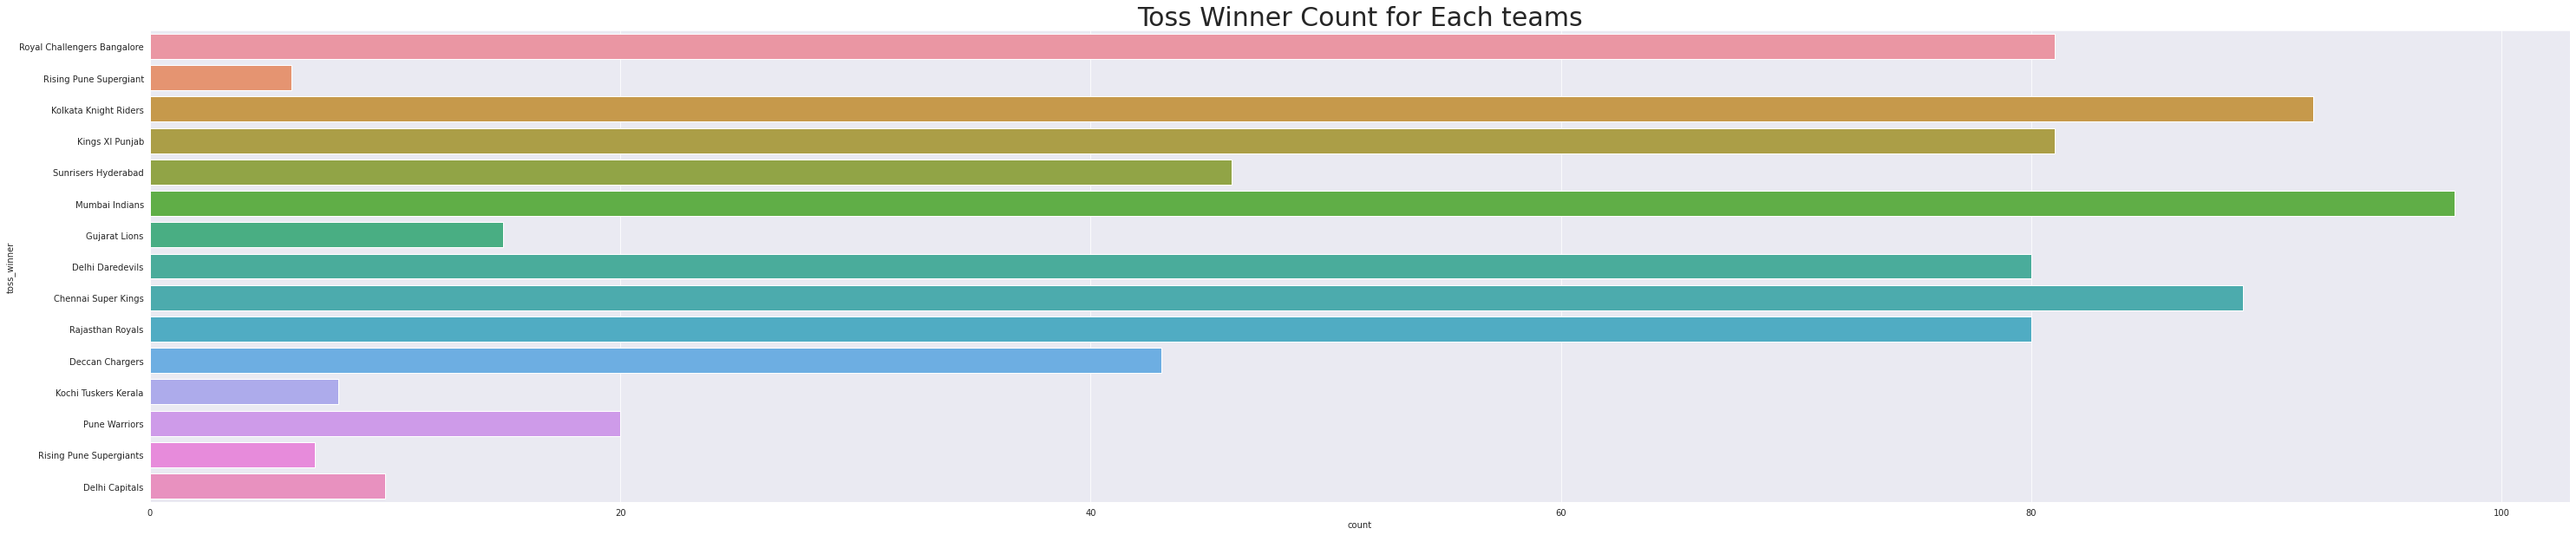

In [ ]:
#visual output.... 
sns.countplot(y = 'toss_winner', data=matches_df)
plt.title('Toss Winner Count for Each teams',fontsize = 30)

In [ ]:
#counting...
toss_decision = matches_df['toss_decision'].value_counts().reset_index()
Total_matches = toss_decision['toss_decision'].sum()

In [ ]:
#calculation
field_precentage  =float((toss_decision.loc[toss_decision['index'] == 'field','toss_decision']/Total_matches)*100)
bat_precentage  =float((toss_decision.loc[toss_decision['index'] == 'bat','toss_decision']/Total_matches)*100)
pos = ['field_precentage','bat_precentage']
value = (field_precentage,bat_precentage)

               * Caluclating the percentage of toss winning team choose bat or field respectively.

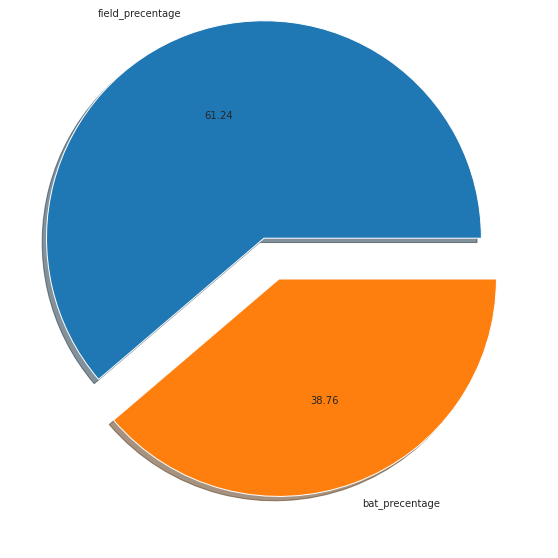

In [ ]:
toss_decision_value = np.array(value)

mylabel1 = ['field_precentage','bat_precentage']

#plt.pie(y, labels = mylabels)
myexplode = [0.2, 0]

plt.pie(toss_decision_value, labels = mylabel1, explode = myexplode, shadow = True,autopct='%.2f')
#plt.legend(title = "Toss_decision percentage",loc="best", fontsize=10)
plt.show()

                   * Almost 61.24% of the teams choose to field after winning a toss.

#**CONCLUSION**
1. Maximum times when team won the toss, they opt for field first.​
2. Team who won the toss and opted for batting have lost a greater number of matches.

3. Scoring runs in IPL after season IPL-2013 is been difficult.​

4. Mumbai Indian is a team who has scored the maximum time highest runs in all seasons.​

5. Lasith Malinga is best bowler in IPL.

6. Rising pune Supergiants had the best bowling attack.​

7. Chris Gayle has won maximum number of man of the match i.e 6 times in IPL 2011.

8. Highest winning margin in terms of runs is 146 runs and in terms of wickets its 10.